In [4]:
"""Python colormaps demo

includes:
examples for registering own color maps
utility for showing all or selected named colormaps including self-defined ones"""


import matplotlib
import matplotlib.colors as col
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np


def register_own_cmaps():
    """define two example colormaps as segmented lists and register them"""
    # a good guide for choosing colors is provided at
    # http://geography.uoregon.edu/datagraphics/color_scales.htm
    #
    # example 1:
    # create own colormap from purple, blue, green, orange to red
    # cdict contains a tuple structure for 'red', 'green', and 'blue'.
    # Each color has a list of (x,y0,y1) tuples, where
    # x defines the "index" in the colormap (range 0..1), y0 is the
    # color value (0..1) left of x, and y1 the color value right of x.
    # The LinearSegmentedColormap method will linearly interpolate between
    # (x[i],y1) and (x[i+1],y0)
    # The gamma value denotes a "gamma curve" value which adjusts the brightness
    # at the bottom and top of the colormap. According to matlab documentation
    # this means:
    # colormap values are modified as c^gamma, where gamma is (1-beta) for
    # beta>0 and 1/(1+beta) for beta<=0
    cdict = {'red': ((0.0, 0.0, 0.0),
                     (0.3, 0.5, 0.5),
                     (0.6, 0.7, 0.7),
                     (0.9, 0.8, 0.8),
                     (1.0, 0.8, 0.8)),
         'green': ((0.0, 0.0, 0.0),
                   (0.3, 0.8, 0.8),
                   (0.6, 0.7, 0.7),
                   (0.9, 0.0, 0.0),
                   (1.0, 0.7, 0.7)),
         'blue': ((0.0, 1.0, 1.0),
                  (0.3, 1.0, 1.0),
                  (0.6, 0.0, 0.0),
                  (0.9, 0.0, 0.0), 
                  (1.0, 1.0, 1.0))}
    cmap1 = col.LinearSegmentedColormap('my_colormap',cdict,N=256,gamma=0.75)
    cm.register_cmap(name='own1', cmap=cmap1)

    # example 2: use the "fromList() method
    startcolor = '#586323'  # a dark olive 
    midcolor = '#fcffc9'    # a bright yellow
    endcolor = '#bd2309'    # medium dark red
    cmap2 = col.LinearSegmentedColormap.from_list('own2',[startcolor,midcolor,endcolor])
    # extra arguments are N=256, gamma=1.0
    cm.register_cmap(cmap=cmap2)
    # we can skip name here as it was already defined 


def discrete_cmap(N=8):
    """create a colormap with N (N<15) discrete colors and register it"""
    # define individual colors as hex values
    cpool = [ '#bd2309', '#bbb12d', '#1480fa', '#14fa2f', '#000000',
              '#faf214', '#2edfea', '#ea2ec4', '#ea2e40', '#cdcdcd',
              '#577a4d', '#2e46c0', '#f59422', '#219774', '#8086d9' ]
    cmap3 = col.ListedColormap(cpool[0:N], 'indexed')
    cm.register_cmap(cmap=cmap3)

    
def show_cmaps(names=None):
    """display all colormaps included in the names list. If names is None, all
defined colormaps will be shown."""
    # base code from http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps
    matplotlib.rc('text', usetex=False)
    a=np.outer(np.arange(0,1,0.01),np.ones(10))   # pseudo image data
    f=plt.figure(figsize=(10,5))
    f.subplots_adjust(top=0.8,bottom=0.05,left=0.01,right=0.99)
    # get list of all colormap names
    # this only obtains names of built-in colormaps:
    maps=[m for m in cm.datad if not m.endswith("_r")]
    # use undocumented cmap_d dictionary instead
    maps = [m for m in cm.cmap_d if not m.endswith("_r")]
    maps.sort()
    # determine number of subplots to make
    l=len(maps)+1
    if names is not None: l=len(names)  # assume all names are correct!
    # loop over maps and plot the selected ones
    i=0
    for m in maps:
        if names is None or m in names:
            i+=1
            ax = plt.subplot(1,l,i)
            ax.axis("off")
            plt.imshow(a,aspect='auto',cmap=cm.get_cmap(m),origin="lower")
            plt.title(m,rotation=90,fontsize=10,verticalalignment='bottom')
    plt.savefig("colormaps.png",dpi=100,facecolor='gray')




register_own_cmaps()
discrete_cmap(8)
show_cmaps(['indexed','Blues','OrRd','PiYG','PuOr',
            'RdYlBu','RdYlGn','afmhot','binary','copper',
            'gist_ncar','gist_rainbow','own1','own2'])
print('aaa')

aaa


<IPython.core.display.Javascript object>


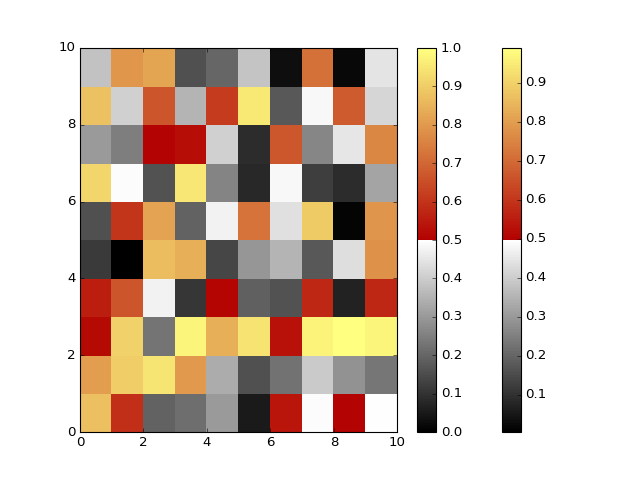

In [1]:
%matplotlib notebook
from pylab import *
cdict = {'red': ((0.0, 0.0, 0.0),
                   (0.5, 1.0, 0.7),
                   (1.0, 1.0, 1.0)),
             'green': ((0.0, 0.0, 0.0),
                       (0.5, 1.0, 0.0),
                       (1.0, 1.0, 1.0)),
             'blue': ((0.0, 0.0, 0.0),
                      (0.5, 1.0, 0.0),
                     (1.0, 0.5, 1.0))}
my_cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)
pcolor(rand(10,10),cmap=my_cmap)
colorbar()

In [7]:
plt.show()

In [2]:
pcolor(rand(0,1),cmap=my_cmap)
colorbar()

In [4]:
rand(10,10)

array([[ 0.41300157,  0.57153169,  0.89110119,  0.9976001 ,  0.11273271,
         0.68469618,  0.41054139,  0.1651872 ,  0.80853047,  0.2101321 ],
       [ 0.88332958,  0.38141925,  0.76277005,  0.67378479,  0.70210836,
         0.35734905,  0.12646979,  0.5253609 ,  0.72511956,  0.83526072],
       [ 0.40177858,  0.36305116,  0.05206951,  0.49089662,  0.65840803,
         0.58447076,  0.45964638,  0.53779175,  0.43080675,  0.00927874],
       [ 0.73849604,  0.90961031,  0.37461025,  0.17062072,  0.87248874,
         0.87394173,  0.75428613,  0.20052026,  0.73539909,  0.17076736],
       [ 0.91859062,  0.15721877,  0.98292083,  0.68938772,  0.99935805,
         0.87956137,  0.97162028,  0.3390142 ,  0.79957843,  0.39668385],
       [ 0.58409266,  0.78809199,  0.27612686,  0.91713494,  0.81840403,
         0.84623639,  0.99138836,  0.06571138,  0.54132051,  0.16957876],
       [ 0.45523795,  0.2721677 ,  0.34444633,  0.71656004,  0.64263689,
         0.9014225 ,  0.76321591,  0.26456838

In [1]:
import matplotlib
import matplotlib.colors as col
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

In [4]:
np.linspace(0,1,10)

array([ 0.        ,  0.11111111,  0.22222222,  0.33333333,  0.44444444,
        0.55555556,  0.66666667,  0.77777778,  0.88888889,  1.        ])

In [7]:
cmap=plt.cm.rainbow
norm = matplotlib.colors.BoundaryNorm(np.arange(-2.5,3,1), cmap.N)
x = np.random.random(20)
y = np.random.random(20)
z = np.random.randint(-2,3,20)
plt.scatter(x,y,c=z,cmap=cmap,norm=norm,s=100,edgecolor='none')
plt.colorbar(ticks=np.linspace(-2,2,5))
plt.show()